In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank_data.csv")

In [4]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [6]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


### Task 1) Plotting scatter plot of expected_recovery_amount vs age for range from 0 to 2000'


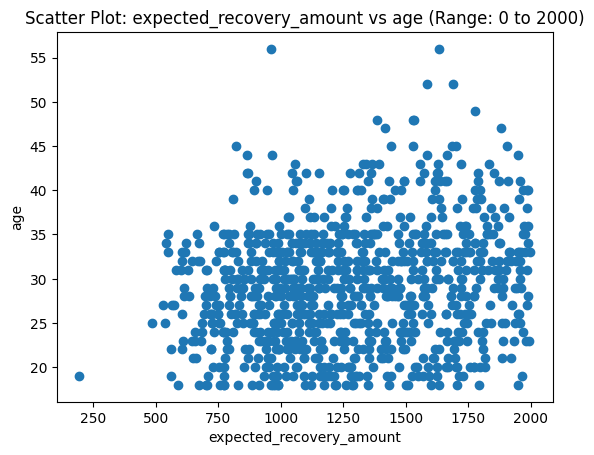

In [65]:

# Define the range for column1
start_range = 0
end_range = 2000

# Filter the DataFrame for the desired range
filtered_data = df[(df['expected_recovery_amount'] >= start_range) & (df['expected_recovery_amount'] <= end_range)]

# Plot the scatter plot
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'])

# Set labels and title
plt.xlabel('expected_recovery_amount')
plt.ylabel("age")
plt.title('Scatter Plot: expected_recovery_amount vs age (Range: {} to {})'.format(start_range, end_range))

# Show the plot
plt.show()

In [66]:
filtered_data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,level
0,2030,194,263.540000,Level 0 Recovery,19,Male,0
1,1150,486,416.090000,Level 0 Recovery,25,Female,0
2,380,527,429.350000,Level 0 Recovery,27,Male,0
3,1838,536,296.990000,Level 0 Recovery,25,Male,0
4,1995,541,346.385000,Level 0 Recovery,34,Male,0
...,...,...,...,...,...,...,...
912,1282,1988,1475.957452,Level 1 Recovery,28,Female,1
913,1879,1988,2508.799693,Level 1 Recovery,34,Female,1
914,922,1990,2072.971170,Level 1 Recovery,40,Male,1
915,1025,1992,1364.515730,Level 1 Recovery,23,Male,1


### 2) Statistical test: age vs. expected recovery amount

In [118]:
import scipy.stats as stats

# Define the threshold range for the expected recovery amount
lower_threshold = 900
upper_threshold = 1100

# Filter the DataFrame for customers within the threshold range
filtered_data = df[(df['expected_recovery_amount'] >= lower_threshold) & (df['expected_recovery_amount'] <= upper_threshold)]

# Extract the age for customers just above the threshold
age_above = filtered_data[filtered_data['expected_recovery_amount'] > 1000 ]['age'].mean()

# Extract the age for customers just below the threshold
age_below = filtered_data[filtered_data['expected_recovery_amount'] < 1000]['age'].mean()

# Perform the two-sample t-test
# test_statistic, p_value = stats.ttest_ind(age_above, age_below, equal_var=False)

# Perform the two-sample h-test krushkal-wallis test
test_statistic, p_value = stats.kruskal(age_above, age_below)

# Define the significance level
alpha = 0.05

# Print the test statistic and p-value
print("Test Statistic:", test_statistic)
print("P-value:", p_value)

# Make a decision based on the p-value and significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Test Statistic: 1.0
P-value: 0.31731050786291115
Fail to reject the null hypothesis.


In [123]:
(filtered_data['expected_recovery_amount'] > 1000).value_counts()

True     95
False    89
Name: expected_recovery_amount, dtype: int64

### 3) Statistical test: sex vs. expected recovery amount

In [40]:
# Number of customers in each category
# Compute the crosstab of sex and recovery_strategy
crosstab = pd.crosstab(df.loc[(df['expected_recovery_amount']<1100) & 
                              (df['expected_recovery_amount']>=900)]['recovery_strategy'], 
                       df['sex'])
crosstab

sex,Female,Male
recovery_strategy,,
Level 0 Recovery,32,57
Level 1 Recovery,39,55


In [109]:
import scipy.stats as stats

# Calculate the percentage of male customers just above the threshold
total_above = filtered_data[filtered_data['expected_recovery_amount'] > 1000].shape[0]
male_above = filtered_data[(filtered_data['expected_recovery_amount'] > 1000) & (filtered_data['sex'] == 'Male')].shape[0]
percentage_male_above = (male_above / total_above) * 100

# Calculate the percentage of male customers just below the threshold
total_below = filtered_data[filtered_data['expected_recovery_amount'] < 1000].shape[0]
male_below = filtered_data[(filtered_data['expected_recovery_amount'] < 1000) & (filtered_data['sex'] == 'Male')].shape[0]
percentage_male_below = (male_below / total_below) * 100

# Perform a chi-square test for proportions
observed = [[male_above, male_below], [total_above - male_above, total_below - male_below]]
chi2, p_value, _, _ = stats.chi2_contingency(observed)

# Define the significance level
alpha = 0.05

# Print the percentages and test results
print("Percentage of Male Customers just above the threshold:", percentage_male_above)
print("Percentage of Male Customers just below the threshold:", percentage_male_below)
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

# Make a decision based on the p-value and significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Percentage of Male Customers just above the threshold: 57.89473684210527
Percentage of Male Customers just below the threshold: 63.63636363636363
Chi-square Statistic: 0.4134008672248815
P-value: 0.5202483871451236
Fail to reject the null hypothesis.


### 4) Exploratory graphical analysis: recovery amount

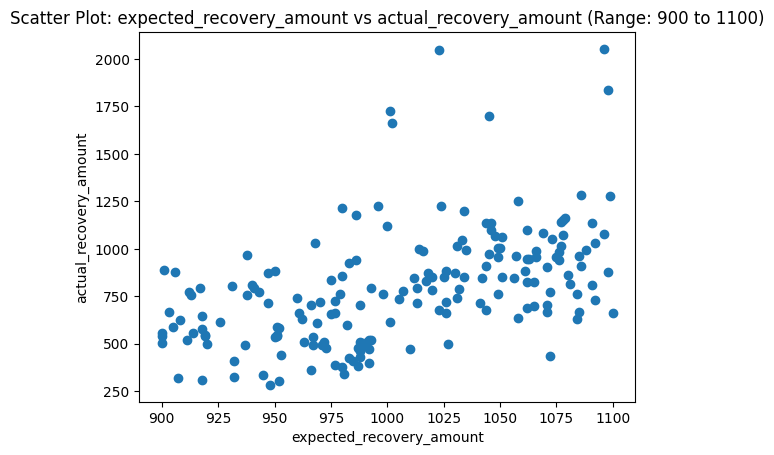

In [124]:
# Define the range for column1
start_range = 900
end_range = 1100

# Filter the DataFrame for the desired range
filtered_data = df[(df['expected_recovery_amount'] >= start_range) & (df['expected_recovery_amount'] <= end_range)]

# Plot the scatter plot
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['actual_recovery_amount'])

# Set labels and title
plt.xlabel('expected_recovery_amount')
plt.ylabel("actual_recovery_amount")
plt.title('Scatter Plot: expected_recovery_amount vs actual_recovery_amount (Range: {} to {})'.format(start_range, end_range))

# Show the plot
plt.show()

### 5) Statistical analysis: recovery amount

In [125]:
import scipy.stats as stats

# Define the range for column1
upper_threshold = 900
lower_threshold = 1100

# Filter the DataFrame for the desired range
above_data = df[(df['expected_recovery_amount'] >= start_range) & (df['expected_recovery_amount'] <= end_range)]

# Define the threshold value
# threshold = 1000

# # Filter the DataFrame for customers above the threshold
# above_data = df[df['expected_recovery_amount'] > threshold]

# Extract the actual recovery amount just above the threshold
actual_recovery_above = above_data[above_data['expected_recovery_amount'] > upper_threshold]['actual_recovery_amount']

# Extract the actual recovery amount just below the threshold
actual_recovery_below = df[(df['expected_recovery_amount'] < lower_threshold)]['actual_recovery_amount']

# Perform a two-sample t-test
# test_statistic, p_value = stats.ttest_ind(actual_recovery_above, actual_recovery_below, equal_var=False)

# Perform the two-sample h-test krushkal-wallis test
test_statistic, p_value = stats.kruskal(actual_recovery_above, actual_recovery_below)


# Define the significance level
alpha = 0.05

# Print the test statistic and p-value
print("Test Statistic:", test_statistic)
print("P-value:", p_value)

# Make a decision based on the p-value and significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Test Statistic: 37.61112651404547
P-value: 8.635051211068772e-10
Reject the null hypothesis.


In [126]:
# Define the range for column1
upper_threshold = 950
lower_threshold = 1050

# Filter the DataFrame for the desired range
above_data = df[(df['expected_recovery_amount'] >= start_range) & (df['expected_recovery_amount'] <= end_range)]

# Define the threshold value
# threshold = 1000

# # Filter the DataFrame for customers above the threshold
# above_data = df[df['expected_recovery_amount'] > threshold]

# Extract the actual recovery amount just above the threshold
actual_recovery_above = above_data[above_data['expected_recovery_amount'] > upper_threshold]['actual_recovery_amount']

# Extract the actual recovery amount just below the threshold
actual_recovery_below = df[(df['expected_recovery_amount'] < lower_threshold)]['actual_recovery_amount']

# Perform a two-sample t-test
# test_statistic, p_value = stats.ttest_ind(actual_recovery_above, actual_recovery_below, equal_var=False)

# Perform the two-sample h-test krushkal-wallis test
test_statistic, p_value = stats.kruskal(actual_recovery_above, actual_recovery_below)


# Define the significance level
alpha = 0.05

# Print the test statistic and p-value
print("Test Statistic:", test_statistic)
print("P-value:", p_value)

# Make a decision based on the p-value and significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Test Statistic: 73.2278918787854
P-value: 1.1551181542046905e-17
Reject the null hypothesis.


### 6) Regression modeling: no threshold

In [130]:
import pandas as pd
import statsmodels.api as sm

# Define the predictor (independent variable) and the outcome (dependent variable)
X = df['expected_recovery_amount']
y = df['expected_recovery_amount']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Build the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     expected_recovery_amount   R-squared:                       1.000
Model:                                  OLS   Adj. R-squared:                  1.000
Method:                       Least Squares   F-statistic:                 3.794e+34
Date:                      Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                              10:56:45   Log-Likelihood:                 50836.
No. Observations:                      1882   AIC:                        -1.017e+05
Df Residuals:                          1880   BIC:                        -1.017e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

### 7) Regression modeling: adding true threshold

In [128]:
import pandas as pd
import statsmodels.api as sm

# Define the predictor (independent variables) and the outcome (dependent variable)
X = df[['expected_recovery_amount']]
y = df['actual_recovery_amount']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create a binary variable to indicate if the expected recovery amount is above the threshold
threshold = 1000
df['above_threshold'] = (df['expected_recovery_amount'] > threshold).astype(int)

# Build the linear regression model with the threshold indicator variable
model_with_threshold = sm.OLS(y, X).fit()

# Print the model summary
print(model_with_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                            14:35:09   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### 8) Regression modeling: adjusting the window

In [129]:
import pandas as pd
import statsmodels.api as sm

# Define the range for the expected recovery amount: $950 to $1050
lower_threshold = 950
upper_threshold = 1050

# Filter the DataFrame for customers within the new threshold range
threshold_data = df[(df['expected_recovery_amount'] >= lower_threshold) & (df['expected_recovery_amount'] <= upper_threshold)]

# Define the predictor (independent variables) and the outcome (dependent variable)
X = threshold_data[['expected_recovery_amount']]
y = threshold_data['actual_recovery_amount']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create a binary variable to indicate if the expected recovery amount is above the threshold
threshold = 1000
threshold_data['above_threshold'] = (threshold_data['expected_recovery_amount'] > threshold).astype(int)

# Build the linear regression model with the threshold indicator variable
model_with_threshold = sm.OLS(y, X).fit()

# Print the model summary
print(model_with_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.238
Model:                                OLS   Adj. R-squared:                  0.230
Method:                     Least Squares   F-statistic:                     30.64
Date:                    Wed, 19 Jul 2023   Prob (F-statistic):           2.60e-07
Time:                            14:36:10   Log-Likelihood:                -702.76
No. Observations:                     100   AIC:                             1410.
Df Residuals:                          98   BIC:                             1415.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\arshj\AppData\Local\Temp\ipykernel_10016\2470343273.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  threshold_data['above_threshold'] = (threshold_data['expected_recovery_amount'] > threshold).astype(int)
